## Divergence of DDA grid

In [60]:
import pyart
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
grid_data_path = '/home/rjackson/multidop_grids/cf_compliant_grid200601200050.nc'

In [62]:
pyart_grid = pyart.io.read_grid(grid_data_path)
units = ['m/s', 'dBZ', 'm/s', 'm/s']
u = pyart_grid.fields['eastward_wind']['data']
v = pyart_grid.fields['northward_wind']['data']                               
w = pyart_grid.fields['upward_air_velocity']['data']

In [75]:
divergence = np.gradient(u, 1e6, axis=2) + np.gradient(v, 1e6, axis=1)
divergence_dict = {'data': divergence,
                   'long_name': 'divergence',
                   'units': 's^{-1}',
                   '_FillValue': -32768.0}
pyart_grid.add_field('divergence', divergence_dict, replace_existing=True)

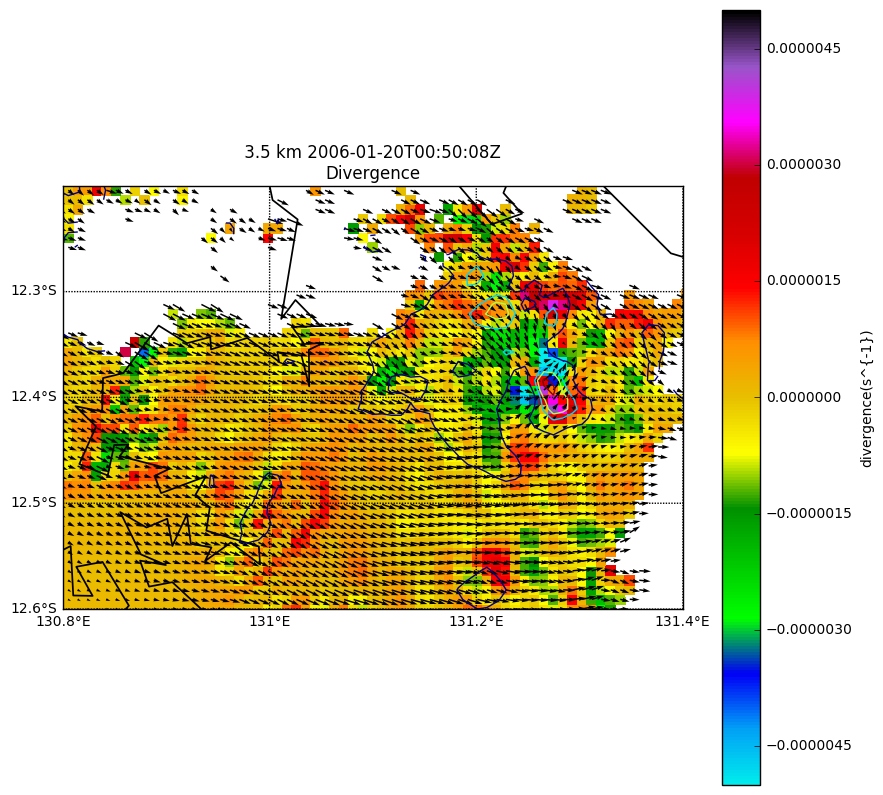

In [77]:
level = 6
plt.figure(figsize=(10,10))
CPOLGridDisplay = pyart.graph.GridMapDisplay(pyart_grid)
CPOLGridDisplay.plot_basemap(min_lat=-12.6, max_lat=-12.2,
                             min_lon=130.8, max_lon=131.4,
                             auto_range=False,
                             lat_lines=[-12.6, -12.5, -12.4, -12.3, -12.2],
                             lon_lines=[130.8, 131.0, 131.2, 131.4],
                             resolution='i')
CPOLGridDisplay.plot_grid('divergence', level, vmin=-5e-6, vmax=5e-6,
                          cmap=pyart.graph.cm.NWSRef)
CPOLGridDisplay.basemap.quiver(lons, lats, 
                               u[level], v[level], 
                               scale=600,
                               latlon='True')
lons, lats = pyart_grid.get_point_longitude_latitude(level=level)
CPOLGridDisplay.basemap.contour(lons, lats,
                                w[level], latlon='True',
                                levels=[1, 4, 6, 10])